<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [1]:
# código

def txt_to_list(archivo):
    arc = open(f"./Archivos/{archivo}.txt", "r")
    lista_arc = arc.read().splitlines()
    return lista_arc

archivos = ['edad','escolaridad','estado_civil','estrato','genero','promedio','region']

for i in archivos:
    globals()[i] = txt_to_list(i)

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

In [2]:
#Transformación de variables a numéricas

edad = [int(x) for x in edad]
estrato = [int(x) for x in estrato]
promedio = [float(x) for x in promedio]

In [3]:
# código

# importación de paquetes necesarios
import numpy as np
import inspect

# función que calcula la mediana de una lista de datos numéricos
def mediana(poblacion):
    return np.median(poblacion)

# función que calcula la desviación de una lista de datos numéricos
def desviacion(poblacion):
    return np.std(poblacion)

#Funcion que calcula el conteo de los datos 
def conteo(poblacion):
    dict_unique = {}
    poblacion = sorted(poblacion)
    for i in list(set(poblacion)):
        dict_unique[i] = poblacion.count(i)
    return dict_unique

#Funcion que calcula la media de los datos numéricos
def media(poblacion):
    return np.mean(poblacion)

def promedio_medio_por_variable(var):
    dict_var = {}
    for i in set(var):
        indices = []
        for j in range(len(var)):
            if var[j] == i:
                indices.append(j)
        prom_var = [promedio[k] for k in indices]
        dict_var[i] = round(np.mean(prom_var),2)
    return dict(sorted(dict_var.items()))

#Función que convierte las variables en str
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][1]

In [4]:
lista_variables = [edad,escolaridad,estrato,genero,promedio,region]
medida = [mediana,desviacion,conteo, media]

for i in lista_variables:
    for j in medida:
        try:
            print(f" el/la {j.__name__} de {retrieve_name(i)} es igual a: {j(i)}.")
        except:
            print(f"no es posible obtener {str(j.__name__)} para la variable {retrieve_name(i)}.")
        print(' ')

 el/la mediana de edad es igual a: 49.0.
 
 el/la desviacion de edad es igual a: 18.59485133040864.
 
 el/la conteo de edad es igual a: {18: 7, 19: 8, 20: 11, 21: 12, 22: 10, 23: 7, 24: 14, 25: 5, 26: 5, 27: 10, 28: 6, 29: 10, 30: 9, 31: 7, 32: 6, 33: 6, 34: 7, 35: 9, 36: 10, 37: 4, 38: 9, 39: 8, 40: 5, 41: 4, 42: 7, 43: 9, 44: 9, 45: 8, 46: 9, 47: 7, 48: 8, 49: 7, 50: 10, 51: 5, 52: 8, 53: 10, 54: 13, 55: 7, 56: 4, 57: 12, 58: 11, 59: 7, 60: 6, 61: 4, 62: 6, 63: 4, 64: 8, 65: 7, 66: 12, 67: 9, 68: 6, 69: 10, 70: 11, 71: 9, 72: 1, 73: 5, 74: 9, 75: 10, 76: 7, 77: 7, 78: 9, 79: 9, 80: 11}.
 
 el/la media de edad es igual a: 48.748.
 
no es posible obtener mediana para la variable escolaridad.
 
no es posible obtener desviacion para la variable escolaridad.
 
 el/la conteo de escolaridad es igual a: {'Maestria': 15, 'Secundaria': 343, 'Primaria': 25, 'Profesional': 117}.
 
no es posible obtener media para la variable escolaridad.
 
 el/la mediana de estrato es igual a: 2.0.
 
 el/la desv

[Text(0.5, 0, 'promedio')]

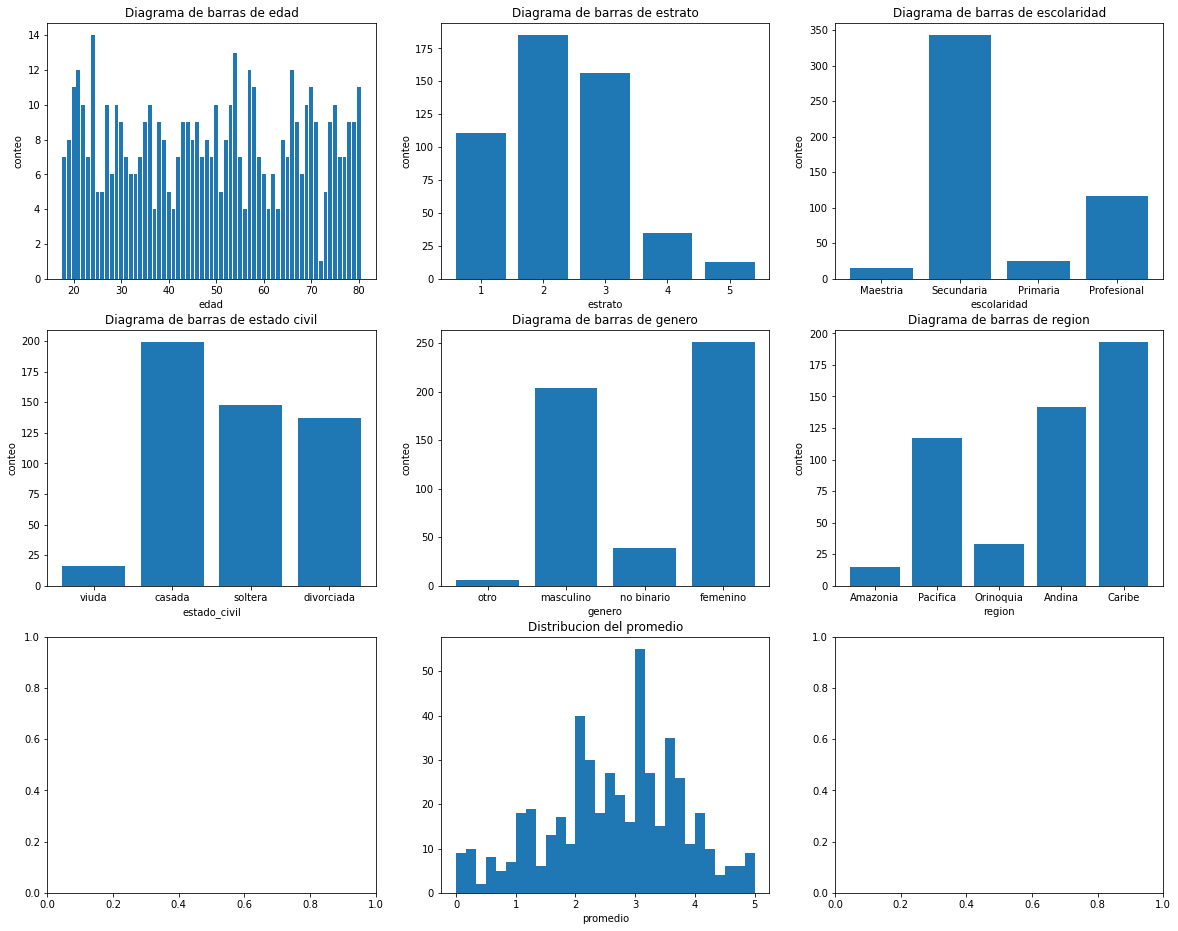

In [5]:
import matplotlib.pyplot as plt

#Generacion de diagramas de barras para las variables excepto promedio e histograma para promedio
fig,ax = plt.subplots(3,3,figsize=(20,16))


ax[0,0].bar(conteo(edad).keys(),conteo(edad).values())
ax[0,0].set_title('Diagrama de barras de edad')
ax[0,0].set(xlabel='edad', ylabel='conteo')
ax[0,1].bar(conteo(estrato).keys(),conteo(estrato).values())
ax[0,1].set_title('Diagrama de barras de estrato')
ax[0,1].set(xlabel='estrato', ylabel='conteo')
ax[0,2].bar(conteo(escolaridad).keys(),conteo(escolaridad).values())
ax[0,2].set_title('Diagrama de barras de escolaridad')
ax[0,2].set(xlabel='escolaridad', ylabel='conteo')
ax[1,0].bar(conteo(estado_civil).keys(),conteo(estado_civil).values())
ax[1,0].set_title('Diagrama de barras de estado civil')
ax[1,0].set(xlabel='estado_civil', ylabel='conteo')
ax[1,1].bar(conteo(genero).keys(),conteo(genero).values())
ax[1,1].set_title('Diagrama de barras de genero')
ax[1,1].set(xlabel='genero', ylabel='conteo')
ax[1,2].bar(conteo(region).keys(),conteo(region).values())
ax[1,2].set_title('Diagrama de barras de region')
ax[1,2].set(xlabel='region', ylabel='conteo')
ax[2,1].hist(promedio, bins=30)
ax[2,1].set_title('Distribucion del promedio')
ax[2,1].set(xlabel='promedio')

[Text(0.5, 0, 'region'), Text(0, 0.5, 'Promedio')]

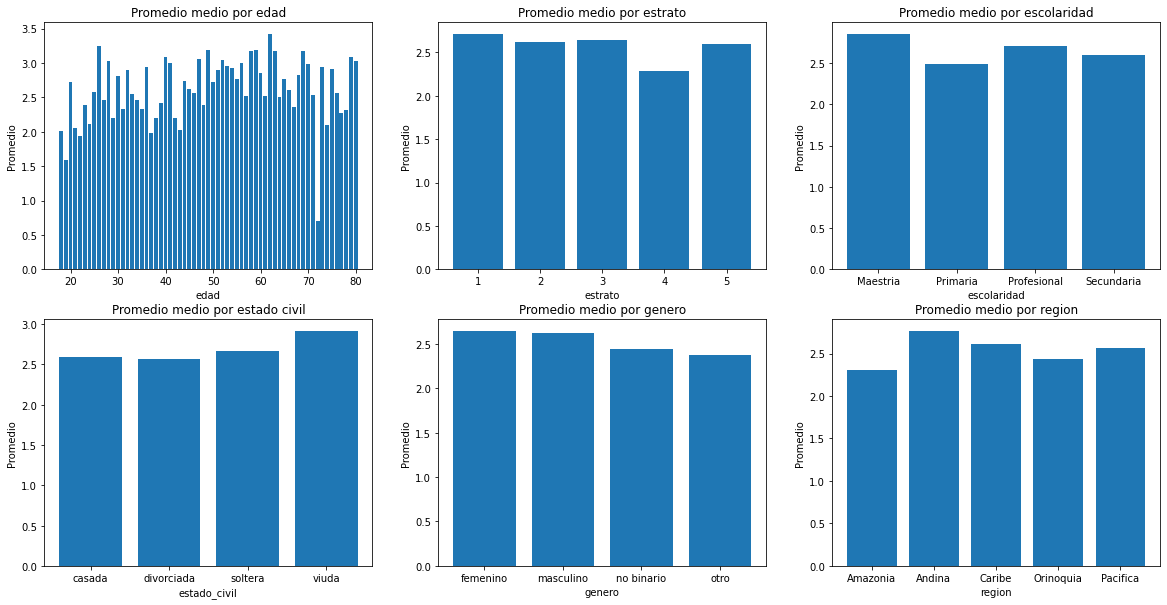

In [6]:
#Generacion de diagramas de barras para el promedio del promedio de las diferentes variables
fig,ax = plt.subplots(2,3,figsize=(20,10))


ax[0,0].bar(promedio_medio_por_variable(edad).keys(),promedio_medio_por_variable(edad).values())
ax[0,0].set_title('Promedio medio por edad')
ax[0,0].set(xlabel='edad', ylabel='Promedio')
ax[0,1].bar(promedio_medio_por_variable(estrato).keys(),promedio_medio_por_variable(estrato).values())
ax[0,1].set_title('Promedio medio por estrato')
ax[0,1].set(xlabel='estrato', ylabel='Promedio')
ax[0,2].bar(promedio_medio_por_variable(escolaridad).keys(),promedio_medio_por_variable(escolaridad).values())
ax[0,2].set_title('Promedio medio por escolaridad')
ax[0,2].set(xlabel='escolaridad', ylabel='Promedio')
ax[1,0].bar(promedio_medio_por_variable(estado_civil).keys(),promedio_medio_por_variable(estado_civil).values())
ax[1,0].set_title('Promedio medio por estado civil')
ax[1,0].set(xlabel='estado_civil', ylabel='Promedio')
ax[1,1].bar(promedio_medio_por_variable(genero).keys(),promedio_medio_por_variable(genero).values())
ax[1,1].set_title('Promedio medio por genero')
ax[1,1].set(xlabel='genero', ylabel='Promedio')
ax[1,2].bar(promedio_medio_por_variable(region).keys(),promedio_medio_por_variable(region).values())
ax[1,2].set_title('Promedio medio por region')
ax[1,2].set(xlabel='region', ylabel='Promedio')

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [7]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = 'Entre los dos métodos a evaluar, ¿Cuál es el mejor según las características de la población resultante?'

pregunta_analytics = 'Realizar funciones y evaluar para diferentes rangos de numeros de becas las poblaciones becadas resultantes. Adicionalmente, si es posible, evaluar con estadística descriptiva cuál de las dos metodologías puede tener un mayor impacto social'

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [8]:
# código
import math
#Crear un diccionario con las variables para cada persona

dict_per = {}
for i in range(len(promedio)):
    dict_per[i] = [edad[i],escolaridad[i],estado_civil[i],estrato[i],genero[i],promedio[i],region[i]]

def becados_estrato(numero_becas):
    #inicializar la lista de becados
    becados = []

    if len(promedio) >= numero_becas:
        while len(becados) < numero_becas:
            for i in sorted(set(estrato)):

                #Se obtienen todos los valores con estrato i que no hayan sido asignados ya y se ordenan
                posibles = {k: v for k, v in dict_per.items() if v[3] == i and k not in becados}
                posibles_ordenados = {k: v for k, v in sorted(posibles.items(), key=lambda item: item[1][5], reverse=True)}

                #Se obtiene la longitud posible en este estrato y se limita el diccionario a esta longitud
                if math.floor(len(posibles_ordenados)*0.02)  == 0:
                    longitud = 1
                else:
                    longitud = math.floor(len(posibles_ordenados)*0.02) 
                posibles_ordenados = dict(list(posibles_ordenados.items())[0:longitud])

                #Se asignan las becas si aun no se han completado los números de becas
                for j in posibles_ordenados.keys():
                    if len(becados) < numero_becas:
                        becados.append(j)
    else:
        print('Existen más becas que número de aspirantes. Todos obtienen becas')
    print(f'los becados para {numero_becas} becas disponibles son:')
    return {k: v for k, v in dict_per.items() if k in becados}

In [9]:
becados_estrato(20)

los becados para 20 becas disponibles son:


{7: [54, 'Secundaria', 'casada', 2, 'femenino', 4.9, 'Andina'],
 9: [80, 'Profesional', 'soltera', 3, 'masculino', 4.5, 'Andina'],
 49: [20, 'Secundaria', 'soltera', 3, 'masculino', 4.5, 'Amazonia'],
 53: [58, 'Secundaria', 'casada', 4, 'femenino', 3.9, 'Caribe'],
 60: [75, 'Primaria', 'casada', 3, 'femenino', 4.9, 'Caribe'],
 99: [64, 'Secundaria', 'viuda', 5, 'femenino', 3.4, 'Orinoquia'],
 109: [60, 'Profesional', 'soltera', 3, 'femenino', 4.7, 'Pacifica'],
 137: [70, 'Profesional', 'divorciada', 2, 'femenino', 4.8, 'Andina'],
 159: [55, 'Profesional', 'soltera', 3, 'masculino', 4.6, 'Caribe'],
 162: [47, 'Secundaria', 'casada', 1, 'masculino', 4.9, 'Andina'],
 207: [21, 'Profesional', 'casada', 2, 'femenino', 4.9, 'Andina'],
 243: [59, 'Secundaria', 'divorciada', 2, 'femenino', 5.0, 'Caribe'],
 259: [60, 'Secundaria', 'soltera', 5, 'no binario', 4.8, 'Andina'],
 283: [28, 'Secundaria', 'divorciada', 1, 'no binario', 4.8, 'Andina'],
 363: [32, 'Secundaria', 'casada', 1, 'femenino', 

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [10]:
# código

def becados_region_genero(numero_becas):
    #Asignar el numero de becas a dar
    becados = []

    #Se observan todas las posibles combinaciones entre region y género y se asignan a una variable
    lista_duplas = []
    for i in range(len(region)):
        lista_duplas.append((region[i],genero[i]))

    posibles_combinaciones = len(set(lista_duplas))

    #Se asigna el número de becas por combinación entre region y genero. 
    if numero_becas%posibles_combinaciones == 0:
        numero_becas_x = int(numero_becas/posibles_combinaciones)

        # Se recorre cada region posible
        for i in set(region):
            posibles_x_region = {k: v for k, v in dict_per.items() if v[6] == i}
            genero_x_region = set([x[1] for x in lista_duplas if i in x[0]])

            #De la region i se recorre cada genero que existe en la region y se ordenan los valores de mayor promedio a menor
            #para cada posible combinacion de region-genero
            for j in genero_x_region:
                posible_combinacion = {k: v for k, v in posibles_x_region.items() if v[4] == j}
                posible_combinacion = {k: v for k, v in sorted(posible_combinacion.items(), key=lambda item: item[1][5], reverse=True)}

                #se limita el diccionario de posibles al numero de becas por dupla region-genero
                if numero_becas_x <= len(posible_combinacion):
                    posible_combinacion = dict(list(posible_combinacion.items())[0:numero_becas_x])
                    for l in posible_combinacion.keys():
                        becados.append(l)
                else:
                    print(f'no hay suficientes personas del genero {j} en la region {i} para asignar el numero de becas requeridas')
                    print(f'se asignan {len(posible_combinacion)} becas al género {j} en la región {i}')
                    for l in posible_combinacion.keys():
                        becados.append(l)
    else:
        print(f'No es posible asignar {numero_becas} becas a todos por igual, se recomienda asignar becas en un número múltiplo de {posibles_combinaciones}')
        numero_becas_x = int(math.floor(numero_becas/posibles_combinaciones))
        # Se recorre cada region posible
        for i in set(region):
            posibles_x_region = {k: v for k, v in dict_per.items() if v[6] == i}
            genero_x_region = set([x[1] for x in lista_duplas if i in x[0]])

            #De la region i se recorre cada genero que existe en la region y se ordenan los valores de mayor promedio a menor
            #para cada posible combinacion de region-genero
            for j in genero_x_region:
                posible_combinacion = {k: v for k, v in posibles_x_region.items() if v[4] == j}
                posible_combinacion = {k: v for k, v in sorted(posible_combinacion.items(), key=lambda item: item[1][5], reverse=True)}

                #se limita el diccionario de posibles al numero de becas por dupla region-genero
                if numero_becas_x <= len(posible_combinacion):
                    posible_combinacion = dict(list(posible_combinacion.items())[0:numero_becas_x])
                    for l in posible_combinacion.keys():
                        becados.append(l)
                else:
                    print(f'no hay suficientes personas del genero {j} en la region {i} para asignar el numero de becas requeridas')
                    print(f'se asignan {len(posible_combinacion)} becas al género {j} en la región {i}')
                    for l in posible_combinacion.keys():
                        becados.append(l)
    print(f'los {len(becados)} becados para {numero_becas} becas disponibles son:')
    return {k: v for k, v in sorted(dict_per.items(), key=lambda item: item[1][6], reverse=True) if k in becados}

In [11]:
becados_region_genero(18)

los 18 becados para 18 becas disponibles son:


{361: [73, 'Profesional', 'divorciada', 1, 'no binario', 4.0, 'Pacifica'],
 363: [32, 'Secundaria', 'casada', 1, 'femenino', 4.9, 'Pacifica'],
 376: [69, 'Secundaria', 'soltera', 1, 'masculino', 5.0, 'Pacifica'],
 4: [26, 'Secundaria', 'divorciada', 2, 'otro', 2.1, 'Orinoquia'],
 113: [57, 'Profesional', 'divorciada', 2, 'femenino', 3.9, 'Orinoquia'],
 422: [50, 'Secundaria', 'soltera', 1, 'masculino', 4.2, 'Orinoquia'],
 22: [51, 'Secundaria', 'casada', 2, 'no binario', 4.3, 'Caribe'],
 136: [60, 'Secundaria', 'soltera', 2, 'otro', 3.6, 'Caribe'],
 243: [59, 'Secundaria', 'divorciada', 2, 'femenino', 5.0, 'Caribe'],
 491: [59, 'Profesional', 'casada', 2, 'masculino', 4.9, 'Caribe'],
 7: [54, 'Secundaria', 'casada', 2, 'femenino', 4.9, 'Andina'],
 162: [47, 'Secundaria', 'casada', 1, 'masculino', 4.9, 'Andina'],
 259: [60, 'Secundaria', 'soltera', 5, 'no binario', 4.8, 'Andina'],
 373: [34, 'Secundaria', 'soltera', 3, 'otro', 2.4, 'Andina'],
 49: [20, 'Secundaria', 'soltera', 3, 'mascu

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [12]:
# código

def get_statistics(d):
    """
    Con el input de la herramienta, obtiene las estadísticas básicas de la población elegida según la herramienta
    """
    if type(d) == str:
        return d
    else:
        edades = [v[0] for k, v in d.items()]
        escolaridades = [v[1] for k, v in d.items()]
        estados_civiles = [v[2] for k, v in d.items()]
        estratos = [v[3] for k, v in d.items()]
        generos = [v[4] for k, v in d.items()]
        promedios = [v[5] for k, v in d.items()]
        regiones = [v[6] for k, v in d.items()]

        print(f'la cantidad de becas asignadas fue de {len(d)}')
        print('')
        promedio_edades = math.floor(np.mean(edades))
        print(f'la media de edad es: {promedio_edades}')
        promedio_medias = np.mean(promedios)
        print(f'la media de promedios es: {promedio_medias}')
        print(f'la media de promedios de los generos es: {promedio_medio_por_variable(generos)}')
        print(f'la media de promedios de los estratos es: {promedio_medio_por_variable(estratos)}')
        print(f'la media de promedios de los estados civiles es: {promedio_medio_por_variable(estados_civiles)}')
        print(f'la media de promedios de la escolaridad es: {promedio_medio_por_variable(escolaridades)}')
        print(f'la media de promedios de las regiones es: {promedio_medio_por_variable(regiones)}')
        print('')
        print(f'El conteo de estratos es: {conteo(estratos)}')
        print(f'El conteo de estado civil es: {conteo(estados_civiles)}')
        print(f'El conteo de generos es: {conteo(generos)}')
        print(f'El conteo de escolaridad es: {conteo(escolaridades)}')
        print(f'El conteo de regiones es: {conteo(regiones)}')

In [13]:
get_statistics(becados_region_genero(18))

los 18 becados para 18 becas disponibles son:
la cantidad de becas asignadas fue de 18

la media de edad es: 48
la media de promedios es: 4.033333333333333
la media de promedios de los generos es: {'femenino': 2.4, 'masculino': 2.78, 'no binario': 2.4, 'otro': 2.22}
la media de promedios de los estratos es: {1: 2.3, 2: 3.16, 3: 1.33, 4: 0.1, 5: 3.5}
la media de promedios de los estados civiles es: {'casada': 2.39, 'divorciada': 2.17, 'soltera': 2.77}
la media de promedios de la escolaridad es: {'Profesional': 3.0, 'Secundaria': 2.36}
la media de promedios de las regiones es: {'Amazonia': 1.55, 'Andina': 2.82, 'Caribe': 3.55, 'Orinoquia': 2.07, 'Pacifica': 2.17}

El conteo de estratos es: {1: 5, 2: 8, 3: 3, 4: 1, 5: 1}
El conteo de estado civil es: {'casada': 8, 'soltera': 6, 'divorciada': 4}
El conteo de generos es: {'otro': 4, 'masculino': 5, 'no binario': 4, 'femenino': 5}
El conteo de escolaridad es: {'Secundaria': 15, 'Profesional': 3}
El conteo de regiones es: {'Amazonia': 4, 'Pac

In [14]:
get_statistics(becados_estrato(18))

los becados para 18 becas disponibles son:
la cantidad de becas asignadas fue de 18

la media de edad es: 50
la media de promedios es: 4.800000000000001
la media de promedios de los generos es: {'femenino': 2.46, 'masculino': 2.34, 'no binario': 3.0}
la media de promedios de los estratos es: {1: 3.3, 2: 2.65, 3: 1.85, 4: 1.2, 5: 3.0}
la media de promedios de los estados civiles es: {'casada': 2.84, 'divorciada': 2.68, 'soltera': 1.97}
la media de promedios de la escolaridad es: {'Primaria': 2.1, 'Profesional': 2.13, 'Secundaria': 2.74}
la media de promedios de las regiones es: {'Amazonia': 2.1, 'Andina': 2.44, 'Caribe': 3.3, 'Pacifica': 1.87}

El conteo de estratos es: {1: 4, 2: 6, 3: 6, 4: 1, 5: 1}
El conteo de estado civil es: {'casada': 7, 'soltera': 7, 'divorciada': 4}
El conteo de generos es: {'masculino': 8, 'no binario': 2, 'femenino': 8}
El conteo de escolaridad es: {'Secundaria': 10, 'Primaria': 1, 'Profesional': 7}
El conteo de regiones es: {'Amazonia': 2, 'Andina': 8, 'Pacif

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [15]:
# código

#Se deben seleccionar la proporción de becas en los siguientes diccionarios según el criterio que se quiera tener en cuenta.

dict_genero = {'masculino':0.25,
              'femenino':0.25,
              'no binario':0.25,
              'otro':0.25}

dict_estrato = {1:0.2,
               2:0.2,
               3:0.2,
               4:0.2,
               5:0.2}

dict_region = {'Andina':0.2,
              'Amazonia':0.2,
              'Caribe':0.2,
              'Orinoquia':0.2,
              'Pacifica':0.2}

#Herramienta de becados.
def herramienta_becados(n_becas = 20,lim_inf=20, lim_sup=80, criterio='genero'):
    """
    Esta es una función que permite determinar cuáles serían los becados segun un limite de edad y un criterio
    de variables a tener en cuenta.
    
    Parámetros:
    n_becas: Número de becas máximo a asignar. int
    lim_inf: Límite inferior de edad. int
    lim_sup: Límite superior de edad. int
    criterio: Criterio bajo el cual se elegirán los becados. Puede ser 'genero', 'estrato' o 'region'. str
    """
    
    #Se hace un diccionario que solo tiene en cuenta los rangos de edades puestos en la función
    dict_limpio = {k: v for k, v in dict_per.items() if v[0] >= lim_inf and v[0] <= lim_sup}
    becados = []
    #Se separa por criterios. El primero es estrato.
    if criterio == 'estrato':
        #Si la suma no es 100%, no se asignan becas.
        if round(sum(dict_estrato.values()),1) != 1.0:
            return f'La proporcion no es igual al 100%. Por favor revisar las proporciones imputadas'
        elif n_becas < len(dict_estrato):
            return f'El numero de becas debe ser mayor a la cantidad de estratos'
        else:
            #Si la suma es 100%, se recorre cada estrato y se le da la proporción de becas definida
            for i in set(estrato):
                n_becas_x = math.floor(dict_estrato[i]*n_becas)
                posibles = {k: v for k, v in dict_limpio.items() if v[3] == i}
                posibles = {k: v for k, v in sorted(posibles.items(), key=lambda item: item[1][5], reverse=True)}
                if len(posibles) < n_becas_x:
                    print(f'no se pueden asignar {n_becas_x} becas al estrato {i}')
                    for i in posibles.keys():
                        becados.append(i)
                else:
                    posibles = dict(list(posibles.items())[0:n_becas_x])
                    for i in posibles.keys():
                        becados.append(i)                 
            return {k: v for k, v in dict_per.items() if k in becados}
    
    if criterio == 'genero':
        #Si la suma no es 100%, no se asignan becas.
        if round(sum(dict_genero.values()),1) != 1.0:
            return f'La proporcion no es igual al 100%. Por favor revisar las proporciones imputadas'
        elif n_becas < len(dict_genero):
            return f'El numero de becas debe ser mayor a la cantidad de generos'
        else:
            #Si la suma es 100%, se recorre cada estrato y se le da la proporción de becas definida
            for i in set(genero):
                n_becas_x = math.floor(dict_genero[i]*n_becas)
                posibles = {k: v for k, v in dict_limpio.items() if v[4] == i}
                posibles = {k: v for k, v in sorted(posibles.items(), key=lambda item: item[1][5], reverse=True)}
                if len(posibles) < n_becas_x:
                    print(f'no se pueden asignar {n_becas_x} becas al genero {i}')
                    for i in posibles.keys():
                        becados.append(i)
                else:
                    posibles = dict(list(posibles.items())[0:n_becas_x])
                    for i in posibles.keys():
                        becados.append(i)                 
            return {k: v for k, v in dict_per.items() if k in becados}

    if criterio == 'region':
        #Si la suma no es 100%, no se asignan becas.
        if round(sum(dict_region.values()),1) != 1.0:
            return f'La proporcion no es igual al 100%. Por favor revisar las proporciones imputadas'
        elif n_becas < len(dict_region):
            return f'El numero de becas debe ser mayor a la cantidad de regiones'
        else:
            #Si la suma es 100%, se recorre cada estrato y se le da la proporción de becas definida
            for i in set(region):
                n_becas_x = math.floor(dict_region[i]*n_becas)
                posibles = {k: v for k, v in dict_limpio.items() if v[6] == i}
                posibles = {k: v for k, v in sorted(posibles.items(), key=lambda item: item[1][5], reverse=True)}
                if len(posibles) < n_becas_x:
                    print(f'no se pueden asignar {n_becas_x} becas a la region {i}')
                    for i in posibles.keys():
                        becados.append(i)
                else:
                    posibles = dict(list(posibles.items())[0:n_becas_x])
                    for i in posibles.keys():
                        becados.append(i)                 
            return {k: v for k, v in dict_per.items() if k in becados}

In [16]:
#Herramienta:

get_statistics(herramienta_becados(n_becas=10,lim_inf=20,lim_sup=70,criterio='region'))

la cantidad de becas asignadas fue de 10

la media de edad es: 47
la media de promedios es: 4.69
la media de promedios de los generos es: {'femenino': 2.15, 'masculino': 3.05}
la media de promedios de los estratos es: {1: 2.92, 2: 2.78, 3: 2.05}
la media de promedios de los estados civiles es: {'casada': 2.62, 'divorciada': 2.65, 'soltera': 2.83}
la media de promedios de la escolaridad es: {'Profesional': 4.5, 'Secundaria': 2.49}
la media de promedios de las regiones es: {'Amazonia': 1.5, 'Andina': 2.25, 'Caribe': 3.3, 'Orinoquia': 4.05, 'Pacifica': 2.35}

El conteo de estratos es: {1: 4, 2: 4, 3: 2}
El conteo de estado civil es: {'casada': 5, 'soltera': 3, 'divorciada': 2}
El conteo de generos es: {'masculino': 6, 'femenino': 4}
El conteo de escolaridad es: {'Secundaria': 9, 'Profesional': 1}
El conteo de regiones es: {'Amazonia': 2, 'Pacifica': 2, 'Orinoquia': 2, 'Andina': 2, 'Caribe': 2}


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [17]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'Creo que la herramienta se debería basar más en los estratos que en cualquier otro factor, debido a que, dado que los estratos son directamente proporcionales al nivel de capacidad económica de las personas, los que más suelen necesitar de este tipo de becas son los estratos bajos. En este caso, yo propondría utilizar esta herramienta con esta variable y con una proporción mucho más alta en los niveles socioeconómicos más bajos que en los altos. Basado en los datos de los diagramas de barras de los estratos y los puntajes medios, propondría darles más peso a los estratos 2 y 1, seguido del 3 y 5 y por último el 4, que es el que tiene menor promedio medio entre todos los estratos. Adicionalmente, propondría que los límites de edad estuvieran entre 20 y 40 años debido a que, primero que todo, esta es la población que más representaría un potencial crecimiento social y económico del país puesto que estas personas son las que tienen más potencial para aprovechar al máximo sus estudios, y segundo, la media del promedio académico es una de las más altas según los datos proporcionados en la misión dos.'

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [18]:
# código
dict_estrato = {1:0.4,
               2:0.4,
               3:0.1,
               4:0.05,
               5:0.05}

get_statistics(herramienta_becados(n_becas=20,lim_inf=20,lim_sup=40,criterio='estrato'))

conclusion = 'Se puede observar que el promedio de edad de 26 años es lo esperado. Adicionalmente, se puede ver que se toma una buena decisión al priorizar los géneros debido a que no hay una diferencia muy elevada entre las medias del género femenino y masculino. A pesar de haber una diferencia alta entre el género no binario y los demás, se puede observar que esto es a causa de que solo hay una persona no binaria entre los escogidos, por lo que la media de los otros géneros tiene asociada una desviación estándar que probablemente esté causando esas grandes diferencias entre la media. Adicionalmente, se puede observar que el conteo de regiones sí es indicativo de que estos estratos y puntajes promedio deben estar ligados de alguna manera con las regiones del pais, lo cual indica la necesidad de un estudio más complejo para entender la relación entre estas variables. Adicionalmente, se puede observar que la escolaridad es la esperada por el rango de fechas que se escogió, se puede observar solamente la presencia de profesionales y de grado secundaria, lo cual refuerza la teoría de que se podrá sacar más provecho de estas becas en estos rangos de edad.'

la cantidad de becas asignadas fue de 20

la media de edad es: 26
la media de promedios es: 4.085
la media de promedios de los generos es: {'femenino': 2.56, 'masculino': 2.25, 'no binario': 3.5}
la media de promedios de los estratos es: {1: 3.08, 2: 1.89, 3: 3.05, 4: 2.1, 5: 2.4}
la media de promedios de los estados civiles es: {'casada': 2.15, 'divorciada': 2.54, 'soltera': 3.07, 'viuda': 2.0}
la media de promedios de la escolaridad es: {'Profesional': 1.8, 'Secundaria': 2.75}
la media de promedios de las regiones es: {'Amazonia': 3.1, 'Andina': 2.27, 'Caribe': 3.02, 'Orinoquia': 2.1, 'Pacifica': 2.33}

El conteo de estratos es: {1: 8, 2: 8, 3: 2, 4: 1, 5: 1}
El conteo de estado civil es: {'viuda': 1, 'casada': 8, 'soltera': 6, 'divorciada': 5}
El conteo de generos es: {'masculino': 6, 'no binario': 1, 'femenino': 13}
El conteo de escolaridad es: {'Secundaria': 15, 'Profesional': 5}
El conteo de regiones es: {'Amazonia': 2, 'Pacifica': 7, 'Orinoquia': 1, 'Andina': 6, 'Caribe': 4}


## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21